In [37]:
import numpy as np
import umap
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

#UMAP_function

def plot_umap(umap_results, labels, ax, **kwargs):

    plt.sca(ax)

    scatter_params = kwargs.get("scatter_params", {})
    scatter = ax.scatter(umap_results[:, 0], umap_results[:, 1], **scatter_params)

    unique_labels = np.unique(labels)
    colors = plt.cm.get_cmap("viridis", len(unique_labels))

    for i, label in enumerate(unique_labels):
        ax.scatter(umap_results[labels == label, 0],
                   umap_results[labels == label, 1],
                   label=f"Class{label}",
                   color=colors(i),
                   **scatter_params)

    if 'set_title' in kwargs.keys():
        ax.set_title(**kwargs['set_title'])
    
    if 'set_xlabel' in kwargs.keys():
        ax.set_xlabel(**kwargs['set_xlabel'])

    if 'set_xlim' in kwargs.keys():
        ax.set_xlim(**kwargs['set_xlim'])
        
    if 'set_xticks' in kwargs.keys():
        ax.set_xticks(**kwargs['set_xticks'])
        
    if 'tick_params' in kwargs.keys():
        ax.tick_params(**kwargs['tick_params'])

    
    ax.spines["right"].set_color("none")
    ax.spines["top"].set_color("none")
    
    ax.legend(title="Classes", loc="best", fontsize=10)

    

C:\Users\4019-tjyen\AppData\Local\Temp\ipykernel_51484\2319801633.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("viridis", len(unique_labels))


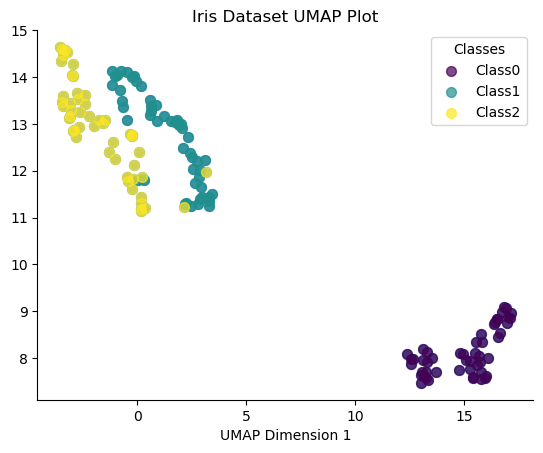

In [38]:
#function example
iris = load_iris()
X = iris.data
labels= iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

umap_results = umap.UMAP(n_components=2).fit_transform(X_scaled)

fig, ax = plt.subplots()
plot_umap(
    umap_results, 
    labels, 
    ax, 
    scatter_params={'s':50, "alpha":0.7}, 
    set_title={'label': 'Iris Dataset UMAP Plot'}, 
    set_xlabel={'xlabel': 'UMAP Dimension 1'},
    set_ylabel={"ylable" : "UMAP Dimension 2"} 
    )
plt.show()